# <span style="color:green">Sentiment Analysis with Facebook comments</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_excel("competitors_db-1.xlsx")

In [10]:
df["Q"]=1

In [11]:
df.columns

Index(['index', 'comment_id', 'comment_text', 'sentiment', 'company',
       'football', 'meaningless', 'Q'],
      dtype='object')

In [13]:
df[['index', 'comment_id', 'sentiment', 'company', 'football','meaningless', 'Q']].head()

,index,comment_id,sentiment,company,football,meaningless,Q
0,1,456917383859280,neutral,1,0,no,1
1,2,368292309628933,positive,1,0,no,1
2,3,3623205924613356,neutral,1,0,no,1
3,4,3855844701316840,neutral,1,0,no,1
4,5,1218376249364293,neutral,1,0,yes,1


In [14]:
df = df[df['meaningless']=='no']

In [15]:
df=df[df["football"]==0]

In [16]:
df=df[df["company"]!=3]

# Engagement Level

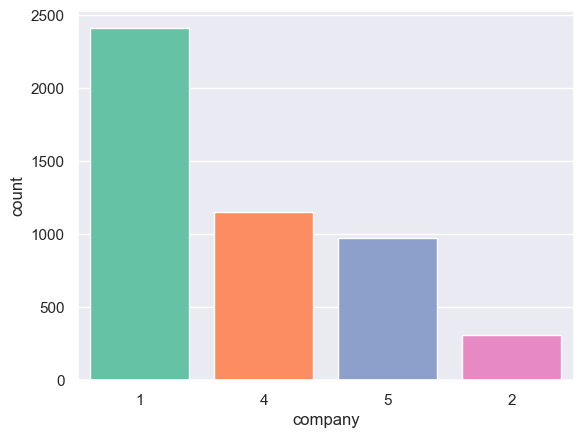

In [17]:
sns.countplot(x=df['company'],data=df,palette=sns.color_palette("Set2"),order=df['company'].value_counts(ascending=False).index,saturation=4);

<Axes: xlabel='company', ylabel='count'>

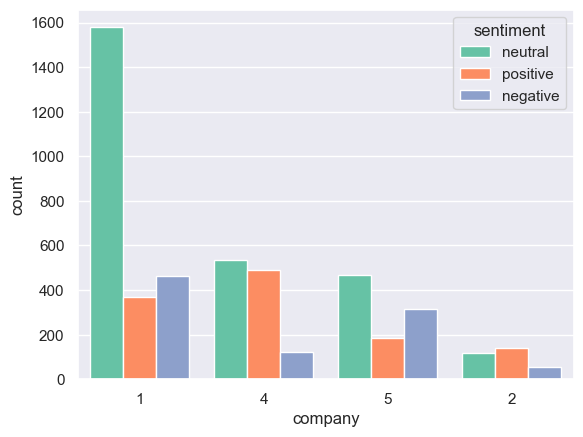

In [19]:
sns.countplot(x=df.company,data=df,hue=df.sentiment,palette=sns.color_palette("Set2"),order=df['company'].value_counts(ascending=False).index,saturation=4)

From the figure we can infer the following:
1. Data fo the 3rd company is not representative and seems they have hidden all the comments other than positive.So we should leave out this info from our analysis.
2. We have disproportionate amount of neutral comments which are mainly results of some contests and actually don't contain valuable customer sentiment and they make our classes extremely unbalanced.We are going to leave this sentiment out if it is about football or we are going to cut them just to get balanced sentiment classses.

In [20]:
df1=df[df["sentiment"]!='neutral']

<Axes: xlabel='company', ylabel='count'>

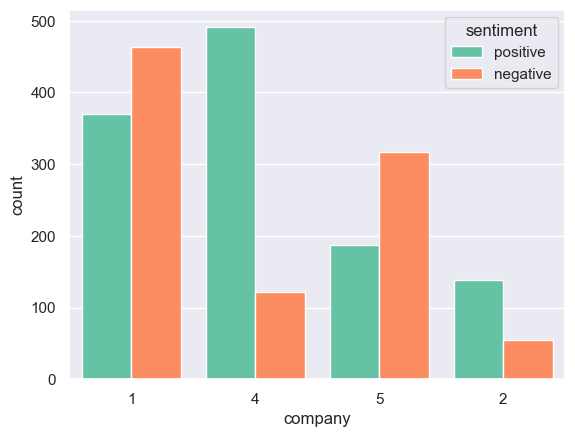

In [21]:
sns.countplot(x=df1.company,data=df1,hue="sentiment",palette=sns.color_palette("Set2"),order=df['company'].value_counts(ascending=False).index,saturation=4)

<Axes: xlabel='company', ylabel='count'>

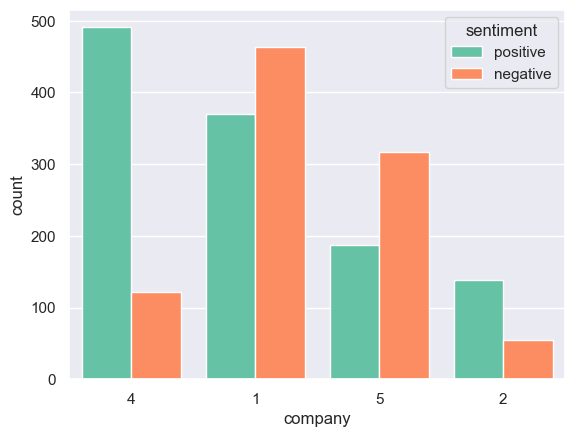

In [22]:
order=df[df['sentiment']=='positive']['company'].value_counts(ascending=False).index
sns.countplot(x=df1.company,data=df1,hue="sentiment",palette=sns.color_palette("Set2"),order=order,saturation=4)

In [23]:
a=df[df['sentiment']=='positive']['company'].value_counts(ascending=False)/df[df['sentiment']!='neutral']['company'].value_counts(ascending=False)*100

In [24]:
a

company
1    44.417767
2    71.649485
4    80.097879
5    37.103175
Name: count, dtype: float64

<Axes: xlabel='company', ylabel='count'>

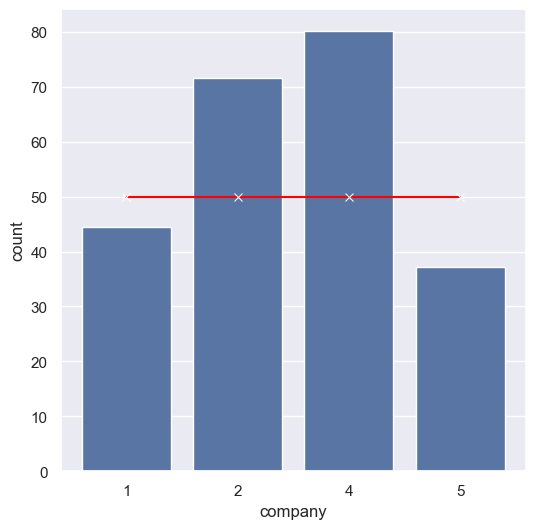

In [25]:
fig, ax1 = plt.subplots(figsize=(6,6))
sns.barplot(a)
sns.lineplot(data = [50,50,50,50], marker='x', color='red',sort = False, ax=ax1)

When it comes to leaders of positive comments, 3's totally positive reputation is very suspicios, I have concerns that they have turned off their negative comments, 4's real reputation is higher, because they have also well expressed negative comments, but both for 5 and 1 positive comments are below 50%, which is not good for reputation.

# Text processing

In [26]:
import nltk

In [27]:
from mots_vides import stop_words
arm = stop_words('armenian')

In Armenian social media there is a phenomena I am not sure is present in any other country. We learn foreign languages & refer them as equal to our native, hence the problem, Armenians can write armenian words with roman or cyrillic alphabet or even in one sentence can be present words written in all 3 alphabets.
That's why before the text processing I decided to analyze comments to check the language.

In [29]:
import re 
def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

In [30]:
def has_mashtotsian(text):
    return bool(re.search('[ա-աԱ-ֆ]', text))

In [31]:
df['cyrillic']=df['comment_text'].apply(lambda text: bool(re.search('[а-яА-Я]', text)))

In [32]:
df['mashtotsian']=df['comment_text'].apply(lambda text: bool(re.search('[ա-աԱ-ֆ]', text)))

In [33]:
df['roman']=df['comment_text'].apply(lambda text: bool(re.search('[a-aA-z]', text)))

In [37]:
df.columns

Index(['index', 'comment_id', 'comment_text', 'sentiment', 'company',
       'football', 'meaningless', 'Q', 'cyrillic', 'mashtotsian', 'roman'],
      dtype='object')

In [38]:
df[['index', 'comment_id','sentiment', 'company','football', 'meaningless', 'Q', 'cyrillic', 'mashtotsian', 'roman']][(df['roman']==True) & (df['mashtotsian']==True)]

,index,comment_id,sentiment,company,football,meaningless,Q,cyrillic,mashtotsian,roman
10,11,1234681737907971,negative,1,0,no,1,False,True,True
24,25,792214279698620,negative,1,0,no,1,False,True,True
28,29,1017217616587902,neutral,1,0,no,1,False,True,True
58,59,985492476913713,neutral,1,0,no,1,False,True,True
87,88,1186452209160005,negative,1,0,no,1,False,True,True
...,...,...,...,...,...,...,...,...,...,...
8754,8755,670796367665855,negative,5,0,no,1,False,True,True
8774,8775,1104191760219522,negative,5,0,no,1,False,True,True
8777,8778,377276611264819,negative,5,0,no,1,False,True,True
8779,8780,1181776485725132,negative,5,0,no,1,False,True,True


In [39]:
(sum(df.cyrillic),sum(df.mashtotsian),sum(df.roman))

(64, 2452, 1627)

In [40]:
df1 = df[(df['roman']==True) | (df['mashtotsian']==True) | (df['cyrillic']==True) & (df['sentiment']!='neutral')]

In [41]:
df1.columns

Index(['index', 'comment_id', 'comment_text', 'sentiment', 'company',
       'football', 'meaningless', 'Q', 'cyrillic', 'mashtotsian', 'roman'],
      dtype='object')

In [42]:
df1[['index', 'comment_id', 'sentiment', 'company','football', 'meaningless', 'Q', 'cyrillic', 'mashtotsian', 'roman']].head()

,index,comment_id,sentiment,company,football,meaningless,Q,cyrillic,mashtotsian,roman
0,1,456917383859280,neutral,1,0,no,1,True,True,False
1,2,368292309628933,positive,1,0,no,1,False,True,False
2,3,3623205924613356,neutral,1,0,no,1,False,True,False
3,4,3855844701316840,neutral,1,0,no,1,False,False,True
6,7,1411479226205562,neutral,1,0,no,1,False,False,True


# NLP

***Steps of a typical NLP analysis:***
1. get the text 
2. tokenize the text
3. stopwords,stemming,lemmatization
4. map tokens to integers
5. convert text into vectors/ TF-IDF
6. do ML task (recommend,detect spam,summarize,topic model)

# 2. Tokenization + 3. stopwords,stemming,lemmatization
- 2.1 punctuation
- 2.2 casing

In [43]:
df = pd.read_excel("competitors_db-1.xlsx")

In [44]:
arm1=["այդ", "այլ", "այն", "այս", "դու", "դուք", "եմ", "են", "ենք", "ես", "եք", "է", "էի", "էին", "էինք", "էիր", "էիք", "էր", "ըստ","ին", "իսկ", "իր", "կամ", "համար", "հետ", "հետո", "մենք", "մեջ", "մի", "նա", "նաև", "նրա", "նրանք", "որ", "որը", "որոնք", "որպես", "ու", "ում", "պիտի", "վրա", "և","եւ","բարև ձեզ", "ձեր","էլ","ձեզ","բայց","բանկ","շատ","բանկը","em","բանկի","e","bank","banke","es","մեր","լավ","shat","vor","u","dzer","el","mi","en","ba","bayc","ինձ","ինչ","երբ","թե","ինչու","մոտ","եթե","ev","գումար","ա","իմ","տալիս","միշտ","կարող","անգամ"]

In [45]:
remove = '|'.join(arm1)
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)

In [46]:
df['new']=df['comment_text'].apply(lambda text:regex.sub("", text) )

In [47]:
df['new'] = df['new'].str.strip()

In [48]:
df['new']=df['new'].apply(lambda text:re.sub(r'[",","?",".","՞",";",":","։"]','',text) )
#: in english and : in armenian are different characters

In [49]:
df['new'] = df['new'].str.replace('  ',' ')

In [50]:
df['new'] = df['new'].str.replace('  ',' ')

In [51]:
df['tokenized_text'] = df['new'].str.split(' ',expand=False)

In [55]:
df.iloc[10:13]

,index,comment_id,comment_text,sentiment,company,football,meaningless,new,tokenized_text
10,11,1234681737907971,"Ճիշտը ճիշտ ա, բայց ի նկատի ունեցեք, որ դուք կա...",negative,1,0,no,Ճիշտը ճիշտ ի նկատի ունեցեք ոչ արտոնյալ պայման...,"[Ճիշտը, ճիշտ, ի, նկատի, ունեցեք, , ոչ, արտոնյա..."
11,12,1128086844929723,"Արժանի է Լայքի, վերջապես, բարձրացված թեմա էր։",positive,1,0,no,Արժանի Լայքի վերջապես բարձրացված թեմա,"[Արժանի, Լայքի, վերջապես, բարձրացված, թեմա, ]"
12,13,1263152878006684,Իսկ կարող են օգտվել այն մարդկ որ ունեն հարկադի...,neutral,1,0,no,օգտվել մարդկ ունեն հարկադիր չմուծած վարկեր,"[օգտվել, մարդկ, ունեն, հարկադիր, չմուծած, վարկեր]"


# WordCloud

In [56]:
from wordcloud import WordCloud

In [64]:
def visualize(sentiment):
    words = ''
    for msg in df[(df['sentiment'] == sentiment)&(df['company']==5)&(df['football']==0)]['new']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(font_path = 'C:\\Users\\xxxx\\Desktop\\xxxxx\\xxxx\\calibri.ttf',width = 800, height = 400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

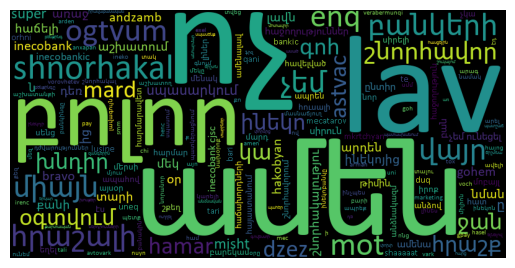

In [61]:
visualize('positive')

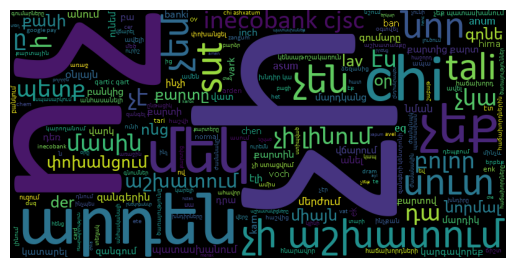

In [62]:
visualize('negative')

from the wordcloud we can see that: 
1. negative comments mainly express the feelings about not working application, absence of apple pay, not getting bonuses
2. when it comes to positive comments they mainly express gratitude and the opinion about good quality of the service.

# 4. Map tokens to integers

# word to index mapping, TF-IDF from scratch

In [65]:
import nltk
from nltk import word_tokenize

In [66]:
idx = 0
word2idx = {}
tokenized_docs = []
for doc in df['new']:
    words = word_tokenize(doc.lower())
    doc_as_int = []
    for word in words:
        if word not in word2idx:
            word2idx[word] = idx
            idx += 1
        
        doc_as_int.append(word2idx[word])
    tokenized_docs.append(doc_as_int)

In [67]:
len(word2idx)

14464

In [68]:
idx2words = {v:k for k,v in word2idx.items()}

In [69]:
len(idx2words)

14464

In [79]:
idx2words[44]

'պայմաններ'

In [80]:
N = len(df['new'])

In [81]:
N

8781

In [82]:
V = len(word2idx)

In [83]:
V

14464

In [84]:
tf = np.zeros((N,V))

In [85]:
for i, doc_as_int in enumerate(tokenized_docs):
    for j in doc_as_int:
        tf[i,j] += 1

In [86]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [87]:
document_freq = np.sum(tf>0,axis =0)
idf = np.log(N/document_freq)

In [88]:
tf_idf = tf * idf

In [89]:
np.random.seed(123)

In [90]:
i = np.random.choice(N)

In [91]:
df[df.index==5505]

,index,comment_id,comment_text,sentiment,company,football,meaningless,new,tokenized_text
5505,5506,408874855025536,Մերի Զաքարյան,neutral,4,0,yes,Մերի Զաքարյան,"[Մերի, Զաքարյան]"


In [92]:
df.iloc[i]

index                                                          3583
comment_id                                         1195313768304113
comment_text      Բարև ձեձ ապրում եմ Երևան քաղաքում ունեն 4 բալի...
sentiment                                                   neutral
company                                                           1
football                                                          0
meaningless                                                      no
new               Բարև ձեձ ապրում Երևան քաղաքում ունեն 4 բալիկ 3...
tokenized_text    [Բարև, ձեձ, ապրում, Երևան, քաղաքում, ունեն, 4,...
Name: 3582, dtype: object

# Building a text classifier

In [94]:
import pandas as pd
import numpy as np
import re

In [95]:
df = pd.read_excel("competitors_db-1.xlsx")
df = df[df['meaningless']=='no']
df=df[df["football"]==0]
df=df[df["company"]!=3]

In [96]:
arm1=["այդ", "այլ", "այն", "այս", "դու", "դուք", "եմ", "են", "ենք", "ես", "եք", "է", "էի", "էին", "էինք", "էիր", "էիք", "էր", "ըստ","ին", "իսկ", "իր", "կամ", "համար", "հետ", "հետո", "մենք", "մեջ", "մի", "նա", "նաև", "նրա", "նրանք", "որ", "որը", "որոնք", "որպես", "ու", "ում", "պիտի", "վրա", "և","եւ","բարև ձեզ", "ձեր","էլ","ձեզ","բայց","բանկ","շատ","բանկը","em","բանկի","e","bank","banke","es","մեր","լավ","shat","vor","u","dzer","el","mi","en","ba","bayc","ինձ","ինչ","երբ","թե","ինչու","մոտ","եթե","ev","գումար","ա","իմ","տալիս","միշտ","կարող","անգամ"]
remove = '|'.join(arm1)
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)
df['new']=df['comment_text'].apply(lambda text:regex.sub("", text) )
df['new'] = df['new'].str.strip()
df['new']=df['new'].apply(lambda text:re.sub(r'[",","?",".","՞",";",":","։"]','',text) )
df['new'] = df['new'].str.replace('  ',' ')
df['new'] = df['new'].str.replace('  ',' ')
df['tokenized_text'] = df['new'].str.split(' ',expand=False)

In [97]:
df=df[df['sentiment']!='neutral']

In [98]:
df['labels'] = df['sentiment'].mask(df.sentiment == 'positive', 1).mask(df.sentiment == 'negative', 0)

In [99]:
df.sentiment.value_counts()

sentiment
positive    1187
negative     957
Name: count, dtype: int64

In [100]:
#collect data into lists
input_texts = []
labels = []

for line in df['new']:
    input_texts.append(line.lower())
    #input_texts.append(df['new'])
for line in df['labels']:
    labels.append(line)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split

In [103]:
train_text, test_text,Ytrain,Ytest = train_test_split(input_texts, labels)

In [104]:
len(Ytest)

536

In [105]:
len(Ytrain), len(Ytest)

(1608, 536)

In [107]:
Ytrain[:5]

[0, 0, 1, 0, 1]

In [108]:
idx = 1
word2idx = {'<unk>':0}

In [109]:
for text in train_text:
    tokens = text.split()
    for token in tokens:
        if token not in word2idx:
            word2idx [token] = idx
            idx += 1

In [113]:
word2idx['fan']

18

In [114]:
len(word2idx)

6915

In [115]:
#convert data into integer format
train_text_int = []
test_text_int  = []

for text in train_text:
    tokens = text.split()
    line_as_int = [word2idx[token] for token in tokens]
    train_text_int.append(line_as_int)
    
for text in test_text:
    tokens = text.split()
    line_as_int = [word2idx.get(token,0) for token in tokens]
    test_text_int.append(line_as_int)

In [116]:
train_text[65]

'ռուսլան հպարտանում քեզնով 🤗'

In [117]:
train_text_int[65]

[544, 545, 546, 547]

In [118]:
#initiate A and pi
V= len(word2idx)

A0  = np.ones((V,V))
pi0 = np.ones(V)


A1  = np.ones((V,V))
pi1 = np.ones(V)

In [119]:
def compute_counts(text_as_int, A,pi):
    for tokens in text_as_int:
        last_idx = None
        for idx in tokens:
            if last_idx is None:
                pi[idx] += 1
            else:
                A[last_idx,idx] += 1
                
            last_idx = idx

In [120]:
compute_counts([t for t,y in zip(train_text_int, Ytrain) if y==0], A0, pi0)
compute_counts([t for t,y in zip(train_text_int, Ytrain) if y==1], A1, pi1)

In [121]:
A0  /= A0.sum(axis=1, keepdims = True)
pi0 /= pi0.sum()

A1  /= A1.sum(axis=1, keepdims = True)
pi1 /= pi1.sum()

In [124]:
logA0  = np.log(A0)
logpi0 = np.log(pi0)

logA1  = np.log(A1)
logpi1 = np.log(pi1)

In [125]:
count0 = sum(y==0 for y in Ytrain)
count1 = sum(y==1 for y in Ytrain)
total = len(Ytrain)

p0 = count0/total
p1 = count1/total

logp0 = np.log(p0)
logp1 = np.log(p1)

In [126]:
p0,p1

(0.44713930348258707, 0.552860696517413)

In [127]:
class Classifier:
    def __init__(self, logAs, logpis, logpriors):
        self.logAs = logAs
        self.logpis = logpis
        self.logpriors = logpriors
        self.K = len(logpriors)
        
    def _compute_log_likelihood(self, input_, class_):
        logA = self.logAs[class_]
        logpi = self.logpis[class_]
        
        last_idx = None
        logprob = 0
        for idx in input_:
            if last_idx is None:
                logprob += logpi[idx]
            else:
                logprob += logA[last_idx, idx]
                
            last_idx = idx
        
        return logprob
    
    def predict(self,inputs):
        predictions = np.zeros(len(inputs))
        for i, input_ in enumerate(inputs):
            posteriors = [self._compute_log_likelihood(input_,c) + self.logpriors[c]\
                         for c in range(self.K)]
            pred = np.argmax(posteriors)
            predictions[i] = pred
        return predictions

In [128]:
clf = Classifier([logA0, logA1], [logpi0, logpi1], [logp0,logp1])

In [129]:
Ptrain = clf.predict(train_text_int)
print(f'Train acc: {np.mean(Ptrain == Ytrain)}')

Train acc: 0.9975124378109452


In [130]:
Ptest = clf.predict(test_text_int)
print(f'Test acc: {np.mean(Ptest == Ytest)}')

Test acc: 0.8022388059701493


In [131]:
from sklearn.metrics import confusion_matrix, f1_score

In [132]:
Ptrain= list(Ptrain)

In [133]:
Ptrain = [int(i) for i in Ptrain]

In [134]:
len(Ptrain)+1

1609

In [135]:
for i in range(0,len(Ptrain)):
    if Ptrain[i]!=Ytrain[i]:
        print(train_text[i])

top fan
aida beglaryan
👍
amen
չեմ հավատում🤩


In [136]:
cm = confusion_matrix(Ytrain, Ptrain)

In [137]:
f1_score(Ytrain, Ptrain)

0.9977528089887641

In [138]:
f1_score(Ytest, Ptest)

0.8389057750759878

In [139]:
cm

array([[716,   3],
       [  1, 888]], dtype=int64)

In [140]:
import seaborn as sn

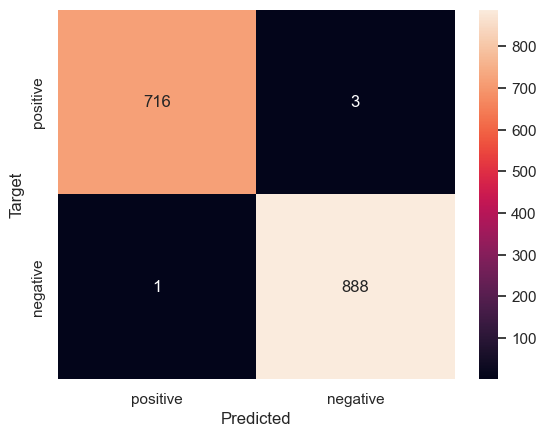

In [141]:
def plot_cm(cm):
    classes = ['positive','negative']
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    ax = sn.heatmap(df_cm, annot = True, fmt = 'g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')
    
plot_cm(cm)

**I believe we have overfitting problem,because of very rare word combinations,which become unique.**

# Spam detection

In [148]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [142]:
df = pd.read_excel("competitors_db-1.xlsx")
df = df[df['meaningless']=='no']
#df=df[df["football"]==0]
df=df[df["company"]!=3]

for the spam detection as a spam column I will use football column just to do the excersise.

<Axes: >

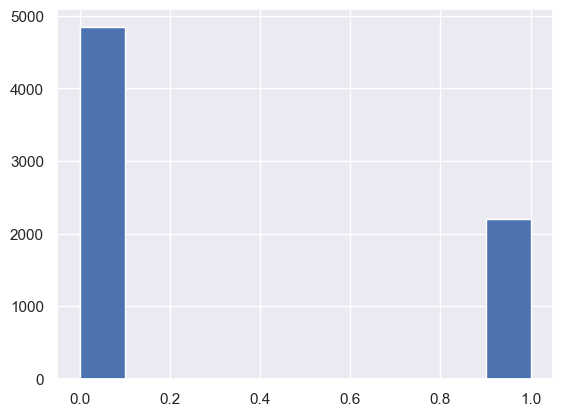

In [144]:
df['football'].hist()

In [145]:
Y = df['football'].to_numpy()

In [146]:
x_train, x_test, Y_train, Y_test = train_test_split(df['comment_text'], Y, test_size = 0.33)

In [149]:
featurizer = CountVectorizer(decode_error = 'ignore')
Xtrain = featurizer.fit_transform(x_train)
Xtest = featurizer.transform(x_test)

In [150]:
model = MultinomialNB()
model.fit(Xtrain,Y_train)
print('Train acc:', model.score(Xtrain,Y_train))
print('Test acc:', model.score(Xtest,Y_test))

Train acc: 0.9618966977138018
Test acc: 0.961340206185567


In [151]:
Ptrain = model.predict(Xtrain)
Ptest  = model.predict(Xtest)
print('Train F1:', f1_score(Y_train,Ptrain))
print('Test F1:', f1_score(Y_test,Ptest))

Train F1: 0.9394754539340955
Test F1: 0.9375866851595007


In [152]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test  = model.predict_proba(Xtest)[:,1]
print('Train AUC:', roc_auc_score(Y_train,Prob_train))
print('Test AUC:', roc_auc_score(Y_test,Prob_test))

Train AUC: 0.9863597580144653
Test AUC: 0.9840246808253943


In [153]:
cm = confusion_matrix(Y_train, Ptrain)
cm

array([[3147,   94],
       [  86, 1397]], dtype=int64)

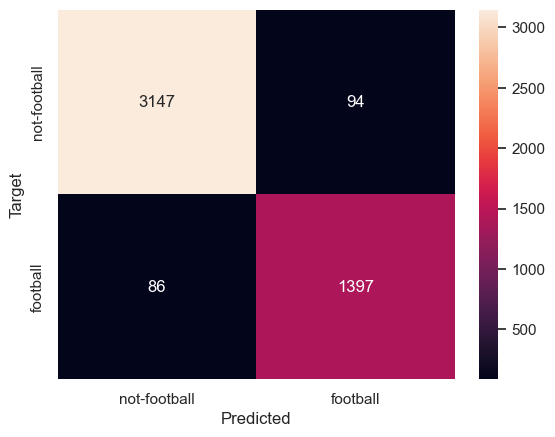

In [154]:
def plot_cm(cm):
    classes = ['not-football','football']
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    ax = sn.heatmap(df_cm, annot = True, fmt = 'g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')
    
plot_cm(cm)

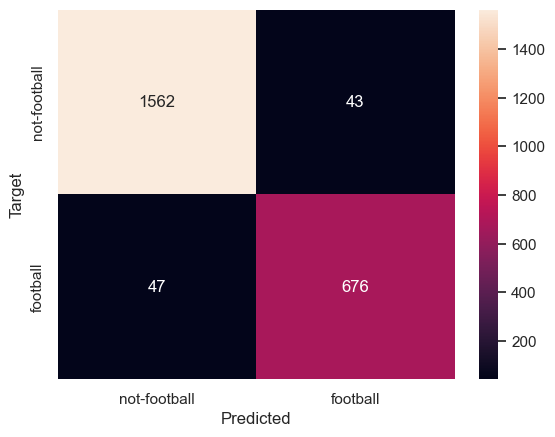

In [155]:
cm_test = confusion_matrix(Y_test, Ptest)
plot_cm(cm_test)

In [157]:
def visualize(label):
    words = ''
    for msg in df[df['football'] == label]['comment_text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(font_path = 'C:\\xxxx\\xxxx\\Desktop\\xxx\\xxxx\calibri.ttf',width = 1500, height = 800).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

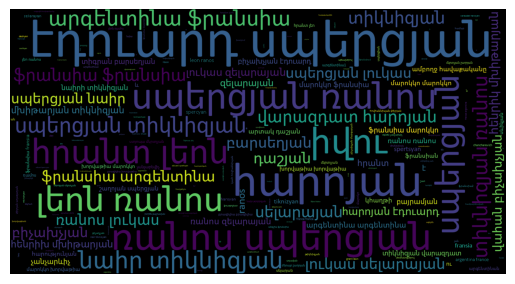

In [159]:
visualize(1)

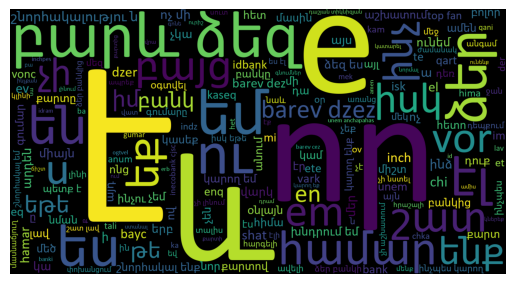

In [160]:
visualize(0)

In [161]:
X = featurizer.transform(df['comment_text'])
df['predictions'] = model.predict(X)

# Sentiment Analysis

- Reputation management (social media monitoring)
- Create report showing sentiment statistics
- Actions can be taken based on the sentiment (marketing)
- Competitor analysis
- Customer support: determine response based on customer sentiment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("competitors_db-1.xlsx")
df = df[df['meaningless']=='no']
df=df[df["football"]==0]
df=df[df["company"]!=3]

In [3]:
df.columns

Index(['index', 'comment_id', 'comment_text', 'sentiment', 'company',
       'football', 'meaningless'],
      dtype='object')

In [4]:
df = df[['sentiment','comment_text']].copy()

In [5]:
target_map = {'positive':1,'negative':0,'neutral':2}
df['target'] = df['sentiment'].map(target_map)

In [6]:
df_train, df_test = train_test_split(df)

In [7]:
vectorizer = TfidfVectorizer(max_features = 2000)

In [8]:
x_train = vectorizer.fit_transform(df_train['comment_text'])

In [9]:
x_train

<3634x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 18449 stored elements in Compressed Sparse Row format>

In [10]:
x_test = vectorizer.fit_transform(df_test['comment_text'])

In [11]:
y_train =df_train['target']
y_test = df_test['target']

In [12]:
model = LogisticRegression(max_iter = 500)
model.fit(x_train,y_train)
print('Train acc:', model.score(x_train,y_train))
print('Test acc:', model.score(x_test,y_test))

Train acc: 0.8186571271326362
Test acc: 0.5239273927392739


In [13]:
pr_train = model.predict_proba(x_train)
pr_test = model.predict_proba(x_test)
print('Train AUC:', roc_auc_score(y_train,pr_train,multi_class = 'ovo'))
print('Test AUC:', roc_auc_score(y_test,pr_test,multi_class = 'ovo'))

Train AUC: 0.9452256408521543
Test AUC: 0.581158342222369


In [14]:
p_train = model.predict(x_train)
p_test = model.predict(x_test)

In [15]:
cm = confusion_matrix(y_train, p_train, normalize = 'true')
cm

array([[0.71045198, 0.0240113 , 0.26553672],
       [0.02466368, 0.55269058, 0.42264574],
       [0.01671583, 0.01032448, 0.97295969]])

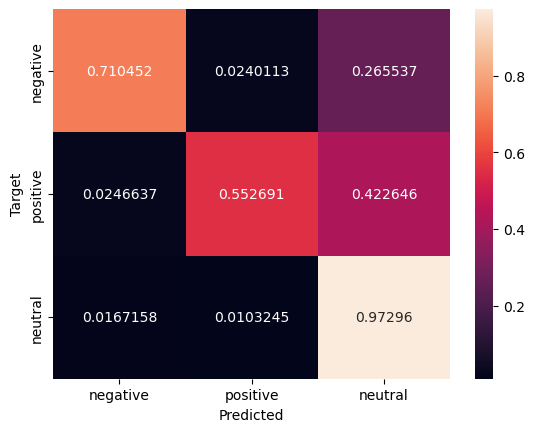

In [16]:
def plot_cm(cm):
    classes = ['negative','positive','neutral']
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    ax = sns.heatmap(df_cm, annot = True, fmt = 'g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')
    
plot_cm(cm)

In [17]:
a=[]
d={}
for i in range(0,len(p_train)):
    if list(p_train)[i]!=list(y_train)[i]:
        a.append(i)
        d[i]=(list(p_train)[i],list(y_train)[i])

In [18]:
z = {}
for i in set(d.values()):
    z[i] = []

In [19]:
z

{(0, 1): [], (1, 2): [], (2, 1): [], (2, 0): [], (0, 2): [], (1, 0): []}

In [20]:
z

{(0, 1): [], (1, 2): [], (2, 1): [], (2, 0): [], (0, 2): [], (1, 0): []}

In [21]:
for key in d:
    for i in set(d.values()):
         if d[key] == i:
            z[i].append(key)

In [22]:
for key in z:
    print(str(key)+":"+str(len(z[key])))

(0, 1):22
(1, 2):21
(2, 1):377
(2, 0):188
(0, 2):34
(1, 0):17


In this notebook I used information and knowledge about NLP learned in the following course:https://www.udemy.com/course/natural-language-processing-in-python